# Project: Wrangling and Analyze Data

### Table of Contents

* [Data Gathering](#DG)
* [Assessing Data](#AD)
   * [Twitter Archived Enhanced Data](#TA)
   * [Image Prediction Data](#IP)
   * [Twitter API Data](#TAPD)
* [Cleaning Data](#CD)
* [Storing Data](#SD)
* [Analysing and Visualising Data](#AVD)
    * [Insights](#I)
    * [Visualisation](#V)

## Data Gathering <a class="anchor" id="DG"></a>

In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
#Import libraries we will be using in the code below
import pandas as pd
import numpy as np
import json
import requests
import os

In [2]:
#Read the twitter archive data that has been uploaded to the local storage.
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#Check first 5 rows of data
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
#Check data columns and data types for twitter archive dataframe
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
# Use response to download the image_predictions.tsv file
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t')

In [6]:
#Check first 5 rows of the image predictions data
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
#Check data types/columns for the image predictions data
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [8]:
#Use Code provided in additional resource page to connect to Twitter API
import tweepy
from tweepy import OAuthHandler
import time

consumer_key = 'Hidden'
consumer_secret = 'Hidden'
access_token = 'Hidden'
access_secret = 'Hidden'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [9]:
#Checking the volume of tweets ids in the twitter archive data
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

2356

In [10]:
# Query Twitter's API for each tweet ID in the Twitter Archive and pull from JSON data.
count = 0
fails_dict = {}
start = time.time()

#Store each Tweet's entire set of Json data in a txt file called tweet_json.txt
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = time.time()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [11]:
#Loading the Twitter API data from the json.txt file into a dataframe
twitter_api_df = []

with open('tweet_json.txt', 'r', encoding = 'utf-8') as file:
    for line in file:
        lines = json.loads(line)
        twitter_api_df.append({'tweet_id': lines['id'],
                              'favourites_count': lines['favorite_count'],
                              'retweets_count': lines['retweet_count'],
                              'timestamp': lines['created_at']})
api_df = pd.DataFrame(twitter_api_df, columns = ['timestamp', 'tweet_id', 'favourites_count', 'retweets_count'])

In [12]:
api_df.head()

,timestamp,tweet_id,favourites_count,retweets_count
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,33728,6979
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,29258,5281
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,21993,3467
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,36827,7201
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,35218,7724


In [13]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
timestamp           2327 non-null object
tweet_id            2327 non-null int64
favourites_count    2327 non-null int64
retweets_count      2327 non-null int64
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


## Assessing Data <a class="anchor" id="AD"></a>
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



## 1. Twitter Archived Enhanced Data <a class="anchor" id="TA"></a>

In [14]:
twitter_archive.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2310,666786068205871104,NaN,NaN,2015-11-18 01:12:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unfamiliar with this breed. Ears pointy af. Wo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666786068...,2,10,None,None,None,None,None
1912,674394782723014656,NaN,NaN,2015-12-09 01:07:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gary. He's a hide and seek champion. S...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674394782...,8,10,Gary,None,None,None,None
1298,707741517457260545,NaN,NaN,2016-03-10 01:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When your roommate eats your leftover Chili's ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707741517...,10,10,None,None,None,None,None
2196,668852170888998912,NaN,NaN,2015-11-23 18:02:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Bobb. Bobb is a Golden High Fescu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668852170...,11,10,Bobb,None,None,None,None
1057,742150209887731712,NaN,NaN,2016-06-13 00:22:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Edmund. He sends stellar selfies. Cute...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/742150209...,8,10,Edmund,None,None,pupper,None
2092,670782429121134593,NaN,NaN,2015-11-29 01:52:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This dude slaps your girl's ass what do you do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670782429...,5,10,None,None,None,None,None
2249,667861340749471744,NaN,NaN,2015-11-21 00:25:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Shotokon Macadamia mix named Cheryl....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667861340...,9,10,a,None,None,None,None
14,889531135344209921,NaN,NaN,2017-07-24 17:02:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,None,None,None,puppo
616,796484825502875648,NaN,NaN,2016-11-09 22:49:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a sleepy doggo that requested some assi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/796484825...,12,10,None,doggo,None,None,None
2025,671882082306625538,NaN,NaN,2015-12-02 02:42:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Batdog. He's sleeping now but when he ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671882082...,11,10,Batdog,None,None,None,None


In [15]:
#Above can see the name for the dogs may have inaccurate data - doing another check
twitter_archive[twitter_archive['name'].apply(len) <= 2]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
393,825876512159186944,NaN,NaN,2017-01-30 01:21:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mo. No one will push him around in the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825876512...,11,10,Mo,None,None,None,None
446,819015337530290176,NaN,NaN,2017-01-11 02:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He was a very good ...,8.190048e+17,4.196984e+09,2017-01-11 02:15:36 +0000,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
449,819004803107983360,NaN,NaN,2017-01-11 02:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
553,804026241225523202,NaN,NaN,2016-11-30 18:16:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's going to make me cry. 13/10 p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/804026241...,13,10,Bo,None,None,None,None
583,800188575492947969,NaN,NaN,2016-11-20 04:06:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He's a Benedoop Cum...,6.816941e+17,4.196984e+09,2015-12-29 04:31:49 +0000,https://twitter.com/dog_rates/status/681694085...,11,10,Bo,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
679,789137962068021249,NaN,NaN,2016-10-20 16:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's a West Congolese Bugaboop Snu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789137962...,12,10,Bo,None,None,None,None
686,788070120937619456,NaN,NaN,2016-10-17 17:32:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo and Ty. Bo eats pape...,7.610045e+17,4.196984e+09,2016-08-04 01:03:17 +0000,https://twitter.com/dog_rates/status/761004547...,11,10,Bo,None,None,None,None
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None


In [16]:
twitter_archive['name'].value_counts()

None        745
a            55
Charlie      12
Cooper       11
Lucy         11
Oliver       11
Penny        10
Lola         10
Tucker       10
Bo            9
Winston       9
Sadie         8
the           8
Bailey        7
Daisy         7
Buddy         7
an            7
Toby          7
Jax           6
Dave          6
Milo          6
Scout         6
Koda          6
Rusty         6
Jack          6
Oscar         6
Stanley       6
Bella         6
Leo           6
Sammy         5
           ... 
Cilantro      1
Willy         1
Crumpet       1
Yukon         1
Mutt          1
Bloop         1
Autumn        1
Barclay       1
Oddie         1
Chef          1
Ronnie        1
O             1
Terrenth      1
Jeremy        1
Horace        1
Tuco          1
Dudley        1
Bauer         1
Clarq         1
Akumi         1
Gin           1
Lambeau       1
Julius        1
Daniel        1
life          1
Cheesy        1
Traviss       1
Clybe         1
light         1
Striker       1
Name: name, Length: 957,

In [17]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [18]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [19]:
#Check for any duplicated tweets in the archive table
len(twitter_archive[twitter_archive['tweet_id'].duplicated()])

0

In [20]:
# Check how many tweets are retweets
twitter_archive.retweeted_status_id.value_counts()

7.757333e+17    1
7.507196e+17    1
6.742918e+17    1
6.833919e+17    1
8.269587e+17    1
8.780576e+17    1
7.320056e+17    1
7.186315e+17    1
6.732953e+17    1
7.914070e+17    1
8.447048e+17    1
7.862340e+17    1
8.685523e+17    1
7.504293e+17    1
8.327664e+17    1
6.690004e+17    1
6.873173e+17    1
7.638376e+17    1
7.815247e+17    1
8.092201e+17    1
8.000650e+17    1
8.174239e+17    1
8.001414e+17    1
7.909461e+17    1
7.867091e+17    1
8.406323e+17    1
8.688804e+17    1
7.869631e+17    1
7.733088e+17    1
8.222448e+17    1
               ..
6.816941e+17    1
7.899865e+17    1
7.939622e+17    1
6.800555e+17    1
7.128090e+17    1
8.164506e+17    1
6.769365e+17    1
6.675487e+17    1
8.083449e+17    1
7.626999e+17    1
6.678667e+17    1
8.479710e+17    1
6.820881e+17    1
8.352641e+17    1
7.761133e+17    1
7.902771e+17    1
6.675484e+17    1
7.677549e+17    1
8.782815e+17    1
8.663350e+17    1
7.399792e+17    1
7.403732e+17    1
8.395493e+17    1
7.001438e+17    1
8.482894e+

In [21]:
# Check value counts for rating_numerator
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [22]:
# Check value counts for rating_denominator
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

## 2. Image Prediction Data <a class="anchor" id="IP"></a>

In [23]:
image_prediction.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False
798,691096613310316544,https://pbs.twimg.com/media/CZdEq-AUMAAWayR.jpg,1,borzoi,0.441269,True,llama,0.278270,False,Arabian_camel,0.063503,False
1611,801285448605831168,https://pbs.twimg.com/media/Cx683NPUAAAjyU4.jpg,1,minivan,0.789376,False,beach_wagon,0.081125,False,convertible,0.064534,False
1528,789137962068021249,https://pbs.twimg.com/media/CvOUw8vWYAAzJDq.jpg,2,Chihuahua,0.746135,True,Pekinese,0.070383,True,Pembroke,0.049237,True
1839,837482249356513284,https://pbs.twimg.com/media/C59VqMUXEAAzldG.jpg,2,birdhouse,0.541196,False,can_opener,0.121094,False,carton,0.056137,False
1581,796484825502875648,https://pbs.twimg.com/media/Cw2uty8VQAAB0pL.jpg,1,cocker_spaniel,0.116924,True,seat_belt,0.107511,False,Australian_terrier,0.099843,True
1897,850380195714523136,https://pbs.twimg.com/ext_tw_video_thumb/85038...,1,Yorkshire_terrier,0.249012,True,Maltese_dog,0.166364,True,Shih-Tzu,0.142254,True
1725,820078625395449857,https://pbs.twimg.com/media/C2GBJADWIAQvcNb.jpg,3,school_bus,0.999833,False,cab,0.000160,False,crane,0.000002,False
874,698178924120031232,https://pbs.twimg.com/media/CbBuBhbWwAEGH29.jpg,1,Chesapeake_Bay_retriever,0.351868,True,malinois,0.207753,True,Labrador_retriever,0.154606,True
870,697881462549430272,https://pbs.twimg.com/media/Ca9feqDUAAA_z7T.jpg,1,washbasin,0.176423,False,paper_towel,0.167462,False,toilet_tissue,0.098029,False


In [24]:
image_prediction[image_prediction['jpg_url'].duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


In [25]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [26]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


## 3. Twitter API Data <a class="anchor" id="TAPD"></a>

In [28]:
api_df.head()

,timestamp,tweet_id,favourites_count,retweets_count
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,33728,6979
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,29258,5281
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,21993,3467
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,36827,7201
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,35218,7724


In [29]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
timestamp           2327 non-null object
tweet_id            2327 non-null int64
favourites_count    2327 non-null int64
retweets_count      2327 non-null int64
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


In [30]:
api_df.describe()

,tweet_id,favourites_count,retweets_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,7034.676837,2461.709497
std,6.820795e+16,10931.897176,4169.338465
min,6.660209e+17,0.000000,1.000000
25%,6.781394e+17,1221.000000,493.000000
50%,7.178418e+17,3041.000000,1147.000000
75%,7.986547e+17,8576.500000,2848.000000
max,8.924206e+17,144430.000000,70443.000000


### Quality issues

#### Twitter_Archive DataFrame

* Incorrect names or missing names in the name column (i.e. a, an Bo, My). Some names are also appearing as None. 

* The source column is still including the html tags in the rows of data. These need to be removed from the data.

* There are ratings which have a denominater which is not 10. I will need to set the denominator for those ratings to 10.

#### Image Prediction DataFrame

* For columns P1, P2 and P3 if the dog breed name consists of multiple words then underscores have been used to separate the words instead of spaces.

* In columns P1_dog, P2_dog & P3_dog there are values which are false, which means these are not dog types. So the data should be removed.

* There are 3 columns for breed names and 3 columns for their relative confidence levels. These need to be combined to one column each. One for confidence intervals and one for breed types.

* 66 jpg_urls have been duplicated in the table which need to be dropped.

#### Twitter API DataFrame

* Keep original tweets only this analysis requires we only like at original tweets and not include retweets.


### Tidiness issues

* All the tables should be part of one dataset, therefore will need to be combined into one table.

* Doggo, floofer, pupper, puppo have all been kept as separate columns however all this data can combined into one column as it's categorising the same data category. 

* The tweet_id columns should be a string and not an integer. This needs to be changed to a string.

## Cleaning Data <a class="anchor" id="CD"></a>
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [31]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
API_DF_clean = api_df.copy()

### Issue #1: Tidiness

#### Define: All tables should be part of one dataset (table). Combining all 3 dataframes into one, so it will be easier to clean the rest of the data as part of this process.

#### Code

In [32]:
#Firstly combine API data with twitter archive
twitter_archive_clean = pd.merge(left = twitter_archive_clean,
                                 right = API_DF_clean, 
                                 left_on= 'tweet_id', 
                                 right_on= 'tweet_id',
                                 how = 'inner')

In [33]:
#Now combine the two datasets with the image prediction dataframe
twitter_archive_clean = twitter_archive_clean.merge(image_prediction_clean,
                                                    on = 'tweet_id',
                                                    how = 'inner')

#### Test

In [34]:
#31 columns as expected  
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2056
Data columns (total 31 columns):
tweet_id                      2057 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp_x                   2057 non-null object
source                        2057 non-null object
text                          2057 non-null object
retweeted_status_id           71 non-null float64
retweeted_status_user_id      71 non-null float64
retweeted_status_timestamp    71 non-null object
expanded_urls                 2057 non-null object
rating_numerator              2057 non-null int64
rating_denominator            2057 non-null int64
name                          2057 non-null object
doggo                         2057 non-null object
floofer                       2057 non-null object
pupper                        2057 non-null object
puppo                         2057 non-null object
timestamp_y                   2057 

In [35]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp_x,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


### Issue #2: Quality

#### Define:  Replace name values which appear as 'a, Bo, Mo etc' to None and drop any names that are None.

#### Code

In [36]:
#Use the replace function to replace all the incorrect names to None
twitter_archive_clean['name'] = twitter_archive_clean['name'].replace(['a', 'an', 'the', 'Mo', 'Bo', 'my', 'al', 'quite', 'by'], 'None')

#Drop all the rows which appear as None
twitter_archive_clean=twitter_archive_clean[twitter_archive_clean.name != 'None']

#### Test

In [37]:
#Use value counts function to check that those values no longer exist in name column
twitter_archive_clean['name'].value_counts()

Tucker      10
Penny       10
Charlie     10
Oliver      10
Cooper      10
Lucy         9
Lola         8
Winston      8
Sadie        8
Daisy        7
Toby         7
Rusty        6
Milo         6
Stanley      6
Bailey       6
Koda         6
Bella        6
Dave         6
Scout        6
Jax          6
Alfie        5
Louis        5
Larry        5
Leo          5
Oscar        5
Buddy        5
Chester      5
one          4
Sophie       4
Jack         4
            ..
Snicku       1
Thor         1
Cilantro     1
Willy        1
Crumpet      1
light        1
Clybe        1
Traviss      1
Jeremy       1
Ace          1
Georgie      1
Covach       1
Cecil        1
Patch        1
Barclay      1
Chef         1
Ronnie       1
O            1
Tuco         1
Terrenth     1
Dudley       1
Sage         1
Bauer        1
Brady        1
Clarq        1
Gin          1
Lambeau      1
Julius       1
Daniel       1
Striker      1
Name: name, Length: 925, dtype: int64

### Issue #3: Quality

#### Define: Remove the html tags from the source column

#### Code

In [38]:
#Use the str.replace function to replace all possible characters in the html tage with a space
twitter_archive_clean["source"] = twitter_archive_clean["source"].str.replace(r'<(?:a\b[^>]*>|/a>)', '')

#### Test

In [39]:
#Use value counts function to check the html tags are no longer included in the source column 
twitter_archive_clean.source.value_counts()

Twitter for iPhone    1380
Twitter Web Client      16
TweetDeck                7
Name: source, dtype: int64

### Issue #4: Tidiness

#### Define: Create a separate column which combines Doggo, floofer, pupper and puppo values into that one column. When creating the final dataset we will drop the separate columns.

#### Code

In [40]:
# Extract the text from the all 4 of the dog tpe columns and create a new collumn called dog_type
twitter_archive_clean['dog_type'] = twitter_archive_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')

#### Test

In [41]:
#Do a sample check to see if the dog_type column values match the values we've extracted from the four columns
twitter_archive_clean[['doggo', 'floofer', 'puppo', 'pupper', 'dog_type']].sample(10)

,doggo,floofer,puppo,pupper,dog_type
560,None,None,None,None,NaN
673,None,None,None,None,NaN
866,None,None,None,None,NaN
1161,None,None,None,None,NaN
506,None,None,None,None,NaN
1446,None,None,None,None,NaN
1439,None,None,None,None,NaN
568,None,None,None,None,NaN
1075,None,None,None,None,NaN
391,None,None,None,None,NaN


### Issue #5: Tidiness

#### Define: Change the tweet_id column should be in string format and not an integer.

#### Code

In [42]:
#use the astype method to change tweet_id column to string
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype('object')

#### Test

In [43]:
#use the info method to check the data type is now string
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1403 entries, 0 to 2026
Data columns (total 32 columns):
tweet_id                      1403 non-null object
in_reply_to_status_id         1 non-null float64
in_reply_to_user_id           1 non-null float64
timestamp_x                   1403 non-null object
source                        1403 non-null object
text                          1403 non-null object
retweeted_status_id           42 non-null float64
retweeted_status_user_id      42 non-null float64
retweeted_status_timestamp    42 non-null object
expanded_urls                 1403 non-null object
rating_numerator              1403 non-null int64
rating_denominator            1403 non-null int64
name                          1403 non-null object
doggo                         1403 non-null object
floofer                       1403 non-null object
pupper                        1403 non-null object
puppo                         1403 non-null object
timestamp_y                   1403 n

### Issue #6: Quality

#### Define: Remove the underscores in P1, P2 and P3 columns to separate the 2 words and use spaces instead.

#### Code

In [44]:
#Use the replace function to replace all the underscores with a space in the P1, P2 and P3 columns
twitter_archive_clean["p1"] = twitter_archive_clean["p1"].str.replace('_', ' ')
twitter_archive_clean["p2"] = twitter_archive_clean["p2"].str.replace('_', ' ')
twitter_archive_clean["p3"] = twitter_archive_clean["p3"].str.replace('_', ' ')

#### Test

In [45]:
#Use value counts to see if the underscores have been replaced with spaces.
twitter_archive_clean["p1"].value_counts()

golden retriever             100
Labrador retriever            68
Pembroke                      64
Chihuahua                     58
pug                           42
chow                          35
toy poodle                    27
Pomeranian                    26
Samoyed                       24
malamute                      23
French bulldog                21
cocker spaniel                21
Siberian husky                19
miniature pinscher            17
Chesapeake Bay retriever      17
seat belt                     16
Cardigan                      16
Staffordshire bullterrier     15
Shih-Tzu                      15
Shetland sheepdog             14
German shepherd               14
beagle                        13
Eskimo dog                    12
teddy                         11
Italian greyhound             11
Pekinese                      11
vizsla                        10
Border collie                 10
collie                        10
Old English sheepdog          10
          

In [46]:
twitter_archive_clean["p2"].value_counts()

Labrador retriever                71
golden retriever                  67
Cardigan                          54
Pomeranian                        30
Chihuahua                         29
Chesapeake Bay retriever          29
French bulldog                    29
toy poodle                        26
miniature poodle                  24
Pembroke                          24
cocker spaniel                    23
Eskimo dog                        22
collie                            21
beagle                            20
Siberian husky                    19
Norwegian elkhound                17
Boston bull                       16
miniature pinscher                16
Pekinese                          14
Italian greyhound                 14
Samoyed                           14
American Staffordshire terrier    14
Staffordshire bullterrier         14
kelpie                            14
pug                               13
kuvasz                            13
malamute                          11
I

In [47]:
twitter_archive_clean["p3"].value_counts()

Labrador retriever                57
Chihuahua                         43
kelpie                            30
golden retriever                  29
chow                              26
Eskimo dog                        25
malamute                          23
toy poodle                        23
beagle                            23
Staffordshire bullterrier         22
Pembroke                          22
cocker spaniel                    22
French bulldog                    21
Pekinese                          21
kuvasz                            21
Chesapeake Bay retriever          20
Pomeranian                        20
pug                               18
American Staffordshire terrier    17
Great Pyrenees                    16
toy terrier                       16
Lakeland terrier                  15
bull mastiff                      15
Siberian husky                    15
Cardigan                          14
Boston bull                       13
basenji                           13
G

### Issue #7: Quality

#### Define: Remove eny entries of data where P1_dog, P2_dog and P3_dog have the values false.

#### Code

In [48]:
#Filtering the data so we only have values where data is True in all 3 columns
twitter_archive_clean = twitter_archive_clean[((twitter_archive_clean['p1_dog'] == True) & 
                  (twitter_archive_clean['p2_dog'] == True) & 
                  (twitter_archive_clean['p3_dog'] == True))]

#### Test

In [49]:
#Check using similar code to above but replace the criteria to equal False
twitter_archive_clean[((twitter_archive_clean['p1_dog'] == False) & 
                  (twitter_archive_clean['p2_dog'] == False) & 
                  (twitter_archive_clean['p3_dog'] == False))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp_x,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type


### Issue #8: Quality

#### Define: Drop the 66 jpg_urls that have been duplicated in the table.

#### Code

In [50]:
#use the drop_duplicates method to drop the duplicate jpg_urls
twitter_archive_clean = twitter_archive_clean.drop_duplicates(subset='jpg_url')

#### Test

In [51]:
#Use the is duplicated method to check for duplicates
twitter_archive_clean[twitter_archive_clean['jpg_url'].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp_x,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type


### Issue #9: Quality

#### Define: Create one column for confidence levels and one column for breed types based on P1, P2 and P3 table in the image predictions table. 

#### Test

In [52]:
#Create an empty data frame for each
dog_breed = []
confidence_interval = []

#Create a function that will append the above lists everytime we see a true prediction
def image_prediction_check(twitter_archive_clean):
    if twitter_archive_clean['p1_dog'] == True:
        dog_breed.append(twitter_archive_clean['p1'])
        confidence_interval.append(twitter_archive_clean['p1_conf'])
    elif twitter_archive_clean['p2_dog'] == True:
        dog_breed.append(twitter_archive_clean['p2'])
        confidence_interval.append(twitter_archive_clean['p2_conf'])
    elif twitter_archive_clean['p3_dog'] == True:
        dog_breed.append(twitter_archive_clean['p3'])
        confidence_interval.append(twitter_archive_clean['p3_conf'])
    else:
        dog_breed.append('Error')
        confidence_interval.append('Error')
        
twitter_archive_clean.apply(image_prediction_check, axis=1)

#Create new columns in the dataframe
twitter_archive_clean['breed'] = dog_breed
twitter_archive_clean['CI'] = confidence_interval

#### Code

In [53]:
#Check for columns in info
twitter_archive_clean.info()

# Comparison of columns
twitter_archive_clean[['breed', 'p1', 'p2', 'p3']].sample(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 854 entries, 1 to 2026
Data columns (total 34 columns):
tweet_id                      854 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp_x                   854 non-null object
source                        854 non-null object
text                          854 non-null object
retweeted_status_id           22 non-null float64
retweeted_status_user_id      22 non-null float64
retweeted_status_timestamp    22 non-null object
expanded_urls                 854 non-null object
rating_numerator              854 non-null int64
rating_denominator            854 non-null int64
name                          854 non-null object
doggo                         854 non-null object
floofer                       854 non-null object
pupper                        854 non-null object
puppo                         854 non-null object
timestamp_y                   854 non-null object

,breed,p1,p2,p3
120,Staffordshire bullterrier,Staffordshire bullterrier,French bulldog,beagle
378,miniature poodle,miniature poodle,toy poodle,soft-coated wheaten terrier
1220,boxer,boxer,bull mastiff,Saint Bernard
1609,malamute,malamute,Eskimo dog,Siberian husky
1720,beagle,beagle,basset,Italian greyhound
897,Siberian husky,Siberian husky,Eskimo dog,malamute
494,Samoyed,Samoyed,malamute,Great Pyrenees
563,Lakeland terrier,Lakeland terrier,golden retriever,standard poodle
449,Staffordshire bullterrier,Staffordshire bullterrier,American Staffordshire terrier,Labrador retriever
1935,Labrador retriever,Labrador retriever,golden retriever,Chesapeake Bay retriever


### Issue #10: Quality

#### Define: Only keep the original tweets in the table. Delete the retweets. 

#### Code

In [54]:
# Use Retweeted_status_id column to filter to only original tweets
twitter_archive_clean = twitter_archive_clean[np.isnan(twitter_archive_clean.retweeted_status_id)] 

#### Test

In [55]:
#Use info to check for 0 non null abjects
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 832 entries, 1 to 2026
Data columns (total 34 columns):
tweet_id                      832 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp_x                   832 non-null object
source                        832 non-null object
text                          832 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 832 non-null object
rating_numerator              832 non-null int64
rating_denominator            832 non-null int64
name                          832 non-null object
doggo                         832 non-null object
floofer                       832 non-null object
pupper                        832 non-null object
puppo                         832 non-null object
timestamp_y                   832 non-null object
fa

### Issue #11: Quality

#### Define: Change the denominator for ratings that aren't 10 to 10, as data here is incorrect.

#### Code

In [56]:
#use drop method to drop unneccessary columns
twitter_archive_clean["rating_denominator"] = twitter_archive_clean["rating_denominator"].replace([50,7], 10)

#### Test

In [57]:
#do a check using the info method
twitter_archive_clean.rating_denominator.value_counts()

10    832
Name: rating_denominator, dtype: int64

## Storing Data <a class="anchor" id="SD"></a>
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [58]:
#Save the clean dataframe to a csv file using the to_csv function
twitter_archive_clean.to_csv('twitter_archive_master.csv', index=False)

In [59]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp_x,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type,breed,CI
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN,Chihuahua,0.323581
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,malamute,0.078253,True,kelpie,0.031379,True,NaN,Chihuahua,0.716012
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,True,English springer,0.225770,True,German short-haired pointer,0.175219,True,NaN,basset,0.555712
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,...,True,Irish setter,0.193054,True,Chesapeake Bay retriever,0.118184,True,NaN,Irish terrier,0.487574
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,doggo,Pembroke,0.511319


## Analyzing and Visualizing Data <a class="anchor" id="AVD"></a>
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights: <a class="anchor" id="I"></a>

#### 1. What are the different sources people are using and which is most popular?

In [60]:
twitter_archive_clean.source.value_counts()

Twitter for iPhone    820
Twitter Web Client     10
TweetDeck               2
Name: source, dtype: int64

The most popular people are using to post Tweets are: Twitter for iPhone.

#### 2. What is the most common life stage of the dogs that are in the WeRate Dogs Archive?

In [61]:
twitter_archive_clean.dog_type.value_counts()

pupper     71
doggo      23
puppo      16
floofer     2
Name: dog_type, dtype: int64

Dogs in the Pupper life stage are most common in the We Rate Dogs Archive

#### 3. Most Popular Dog Name 

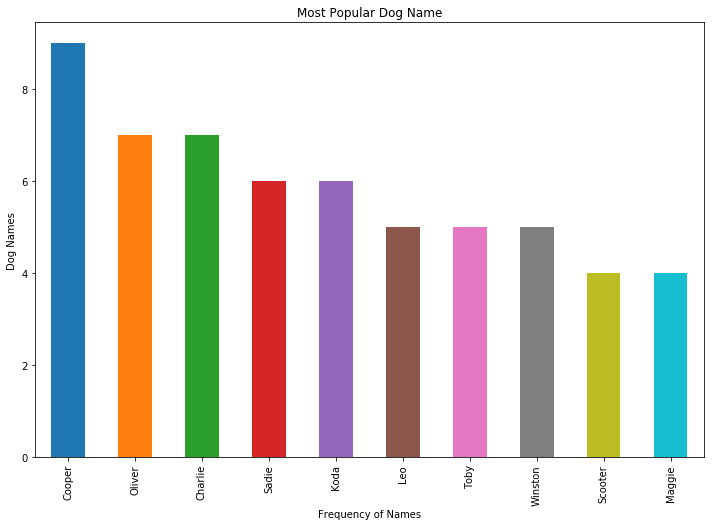

In [65]:
#import matplot library
import matplotlib.pyplot as plt

## Plot the top 10 Dog names by frequency
plt.figure(figsize=(12, 8))
popular_dog_names = twitter_archive_clean.name.value_counts().nlargest(10).plot(kind = 'bar');
popular_dog_names.set_title('Most Popular Dog Name');
popular_dog_names.set_xlabel('Frequency of Names');
popular_dog_names.set_ylabel('Dog Names');

Most Popular Dog Name is Cooper

### Visualization <a class="anchor" id="V"></a>

#### Create a scatter plot to show Retweets and Favourites Count

Text(0.5,1,'Scatter Plot Showing Relationship Between Retweets and Favourites Count')

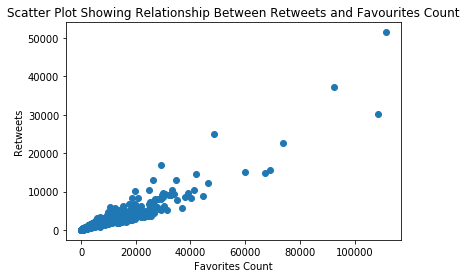

In [63]:
#Use a scatter plot to plot the relationship between retweets and favourite counts
plt.scatter(twitter_archive_clean['favourites_count'], twitter_archive_clean['retweets_count'])
plt.xlabel('Favorites Count')
plt.ylabel('Retweets')
plt.title('Scatter Plot Showing Relationship Between Retweets and Favourites Count')

The Scatter Plot shows there is a positive relationship between the favourites count and the retweets.

#### Find out what breed of dog is the most common dog in the dataset

Text(0,0.5,'Breed of dog')

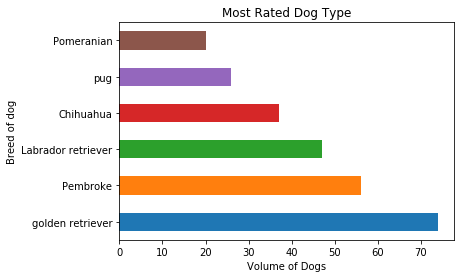

In [64]:
#Create a histrogram for most rated dog breeds
dog_breed = twitter_archive_clean.groupby('breed').filter(lambda x: len(x) >= 20)

dog_breed['breed'].value_counts().plot(kind = 'barh')
plt.title('Most Rated Dog Type')
plt.xlabel('Volume of Dogs')
plt.ylabel('Breed of dog')